In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_data= pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_train.csv')

In [ ]:
print(list(train_data.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [ ]:
ness_cols = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
        'DAYS_EMPLOYED','OWN_CAR_AGE','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE',
         'EXT_SOURCE_2', 'EXT_SOURCE_3','LIVINGAREA_AVG','TOTALAREA_MODE',
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
             'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
prob_ness_cols = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','FLAG_MOBIL',
                  'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_EMAIL',
                  'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                  'LIVE_REGION_NOT_WORK_REGION','DAYS_LAST_PHONE_CHANGE']

In [ ]:
unness_cols = set(train_data.columns) - set(ness_cols)
unness_cols = list(unness_cols - set(prob_ness_cols))
unness_cols

['LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_14',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'COMMONAREA_MODE',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_15',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_AVG',
 'FLOORSMAX_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_2',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'ELEVATORS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'ENTRANCES_MODE',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_9',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_17',
 'YEARS_BUILD_MODE',
 'FLAG_DOCUMENT_4',
 'YEARS_BUILD_AVG',
 'FLOORSMAX_MODE',
 'HOUSETYPE_MODE',
 'FLAG_DOCUMENT_5',
 'FONDKAPREMONT_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'EMERGENCYSTATE_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'ENTRANCES_AVG',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLAG_DOCUMENT_3',
 'LANDAREA_MODE',
 'F

In [ ]:
print(len(unness_cols))
print(len(ness_cols))
print(len(prob_ness_cols))

77
32
13


In [ ]:
77 +32 +13

122

In [ ]:
def split_num_cat(df):

  """
    Takes a DataFrame as input and returns two lists.

    Args:
        df (pd.DataFrame): Input pandas DataFrame.

    Returns:
        nums_list, cat_list : Two lists thats holds numeical and catiogercal columns.
    """
  #decribe method return numerical columns only
  nums_list = list(df.describe().columns)
  #convert to list to be apply to subtract numerical columns from all columns
  cat_list = list(set(df.columns) - set(nums_list))

  return nums_list,cat_list

In [ ]:
def heatmap_with_corr(df):
  """
    Generates a heatmap showing the correlation matrix of a DataFrame.

    Args:
        df (pd.DataFrame): Input pandas DataFrame.

    Returns:
        None
    """
  import seaborn as sns
  # Calculate correlation matrix
  corr = df[df.describe().columns].corr()

  # Create the heatmap
  plt.subplots(figsize = (20, 15))
  sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           cmap = 'RdBu',
           linewidth = 0.1)
  plt.title("Correlation Heatmap", fontsize=20)


In [ ]:
def null_columns(df):
  """
    Identifies columns with null values in a DataFrame and categorizes them by type.

    Args:
        df (pd.DataFrame): Input pandas DataFrame.

    Returns:
        num_nulls (pd.DataFrame): Numerical columns with null values.
        cat_nulls (pd.DataFrame): Categorical columns with null values.
    """
  # Count null values per column
  nuls = df.isna().sum()
  nuls = nuls.reset_index()
  nuls = nuls.rename(columns = { 'index' : "Columns_names", 0 : "Nulls_Count"})

  # Sort by null count in descending order
  nuls = nuls.sort_values(by="Nulls_Count", ascending=False)

  # Filter columns with null values
  nuls = nuls[nuls['Nulls_Count'] > 0]
  print(f'data have {nuls.shape[0]} columns with null values with percentage {(nuls.shape[0] / df.shape[1]) * 100:.2f} % of all columns\n')

  # Calculate percentage of nulls
  nuls['Percentage'] = (nuls['Nulls_Count'] / df.shape[0]) * 100

  # assigns the data types of the columns in the DataFrame (df) to the Column_Type column in the nuls DataFrame.
  #(.map) matches the column names in nuls['Columns_names'] with the index of df.dtypes and retrieves the corresponding data type.
  nuls['Column_Type'] = nuls['Columns_names'].map(df.dtypes)

  # Split into categorical and numerical columns
  cat_nulls = nuls[nuls['Column_Type'] == 'object']
  num_nulls = nuls[nuls['Column_Type'] != 'object']

  return num_nulls,cat_nulls


In [ ]:
def check_balance(df, column_name):

  """
    Computes the count and percentage distribution of unique values in a specified column of a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The column name to analyze.

    Returns:
        pd.DataFrame: A DataFrame with columns:
            - 'Class': The unique values in the specified column.
            - 'Count': The count of each unique value.
            - 'Percentage': The percentage distribution of each unique value.
    """
    # Get value counts and percentages
  counts = df[column_name].value_counts()
  percentages = (counts / len(df)) * 100

  # Create and return a DataFrame with the results
  balance_df = pd.DataFrame({
      'Class': counts.index,
      'Count': counts.values,
      'Percentage': percentages.values
  })

  return balance_df

In [ ]:
def columns_with_null_percentage(df,percentage):
  """
    Returns a list of column names where the percentage of null values
    is greater than or equal to the specified threshold.

    Args:
        null_df (pd.DataFrame): DataFrame containing columns 'Percentage' and 'Column_Name'.
        percentage (float): Threshold for filtering columns by null percentage.

    Returns:
        list: List of column names meeting the percentage criteria.
    """
  required_columns = {"Percentage", "Columns_names"}
  if not required_columns.issubset(df.columns):
        raise ValueError(f"The input DataFrame must contain the columns: {required_columns}")

  column_list = list(df[df['Percentage'] >= percentage]['Columns_names'])

  return column_list



In [ ]:
def columns_with_null_rows(df,rows_number):
  """
    Identifies columns in a DataFrame where the number of null rows is
    less than a specified threshold.

    Args:
        df (pd.DataFrame): The input pandas DataFrame.
        rows_number (int): The threshold for the number of null rows.

    Returns:
        list: List of column names meeting the condition.
    """
  required_columns = {"Nulls_Count", "Columns_names"}
  if not required_columns.issubset(df.columns):
        raise ValueError(f"The input DataFrame must contain the columns: {required_columns}")

  column_list = list(df[df['Nulls_Count'] < rows_number]['Columns_names'])

  return column_list



In [ ]:
def drop_columns(df,list):
  """
    Drops specified columns from a DataFrame.

    Args:
        df (pd.DataFrame): The input pandas DataFrame.
        columns_to_drop (list): List of column names to drop.

    Returns:
        pd.DataFrame: The DataFrame with specified columns removed.
    """
  df.drop(columns = list,inplace = True)

  return df

In [ ]:
def drop_rows(df,list):
  """
    Drops rows from the DataFrame where any of the specified columns contain null values.

    Args:
        df (pd.DataFrame): The input pandas DataFrame.
        columns_list (list): List of column names to check for null values.

    Returns:
        pd.DataFrame: The DataFrame with rows dropped where nulls were found in the specified columns.
    """
  df.dropna(axis = 0,subset = list,inplace = True)

  return df

In [ ]:
def miss_forest_impute(df,list):
  """
    Imputes missing values in specified numerical columns using the MissForest algorithm.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns (list): List of numerical column names to impute.

    Returns:
    - pd.DataFrame: DataFrame with imputed values in the specified columns.
    """
  from missforest import MissForest

  imputer = MissForest()
  num_df_imputed = imputer.fit_transform(df[list])
  df_imputed = pd.DataFrame(num_df_imputed, columns=list)
  return df_imputed


In [ ]:
def impute_categorical(df, cat_cols):
    from sklearn.ensemble import RandomForestClassifier
    # Initialize the RandomForestClassifier
    cat_imputer = RandomForestClassifier()

    for col in cat_cols:
        # Check if there are missing values in the column
        if df[col].isnull().sum() > 0:
            # Prepare the data for the RandomForest model
            df_not_null = df[df[col].notnull()]  # Rows without missing values in the target column
            df_null = df[df[col].isnull()]       # Rows with missing values in the target column

            # Train the RandomForest model
            cat_imputer.fit(df_not_null.drop(columns=cat_cols), df_not_null[col])

            # Predict and impute missing values for categorical columns
            df.loc[df[col].isnull(), col] = cat_imputer.predict(df_null.drop(columns=cat_cols))

    return df

In [ ]:
def categorical_column_frequency(df, cat_cols):
    result_dfs = []

    for col in cat_cols:
        count_df = df[col].value_counts(dropna=False).reset_index()
        count_df.columns = ['Value', 'Frequency']
        count_df['Percentage'] = (count_df['Frequency'] / len(df)) * 100
        count_df['Column_name'] = col
        result_dfs.append(count_df)

    # Concatenate all the results into a single DataFrame
    result_df = pd.concat(result_dfs, axis=0).reset_index(drop=True)
    result_df = result_df.sort_values(by="Frequency", ascending=False)
    return result_df

In [ ]:
train_data.shape

(307511, 122)

In [ ]:
print(f'Total columns : {train_data.shape[1]}\n')
print(f'number of unnessery columns : {len(unness_cols)}\n')
print('Dropping unnessery columns .....\n')
drop_columns(train_data,unness_cols)
print(f'number of total columns after droppping : {train_data.shape[1]} \n')


Total columns : 122

number of unnessery columns : 77

Dropping unnessery columns .....

number of total columns after droppping : 45 



In [ ]:
id_col = train_data['SK_ID_CURR']
id_col



nums_colunms,cat_columns = split_num_cat(train_data)
print(f'number of numerical coloumns : {len(nums_colunms)}\n')
print(f'number of catogeriacal coloumns : {len(cat_columns)}\n')

#drop 'SK_ID_CURR' column from numerical list
nums_colunms.remove('SK_ID_CURR')
train_data.drop(columns = ['SK_ID_CURR'],inplace = True)

print(f'number of numerical coloumns after removing "SK_ID_CURR" column : {len(nums_colunms)}\n')

number of numerical coloumns : 35

number of catogeriacal coloumns : 10

number of numerical coloumns after removing "SK_ID_CURR" column : 34



In [ ]:
train_data.shape

(307511, 44)

In [ ]:
train_data.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.139376,0.0190,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,0.0549,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.729567,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [ ]:
train_data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,246546.000000,153161.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.510853,0.107399,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.194844,0.110565,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.370650,0.045300,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.535276,0.074500,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.669057,0.129900,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,0.896010,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,261.000000,25.000000


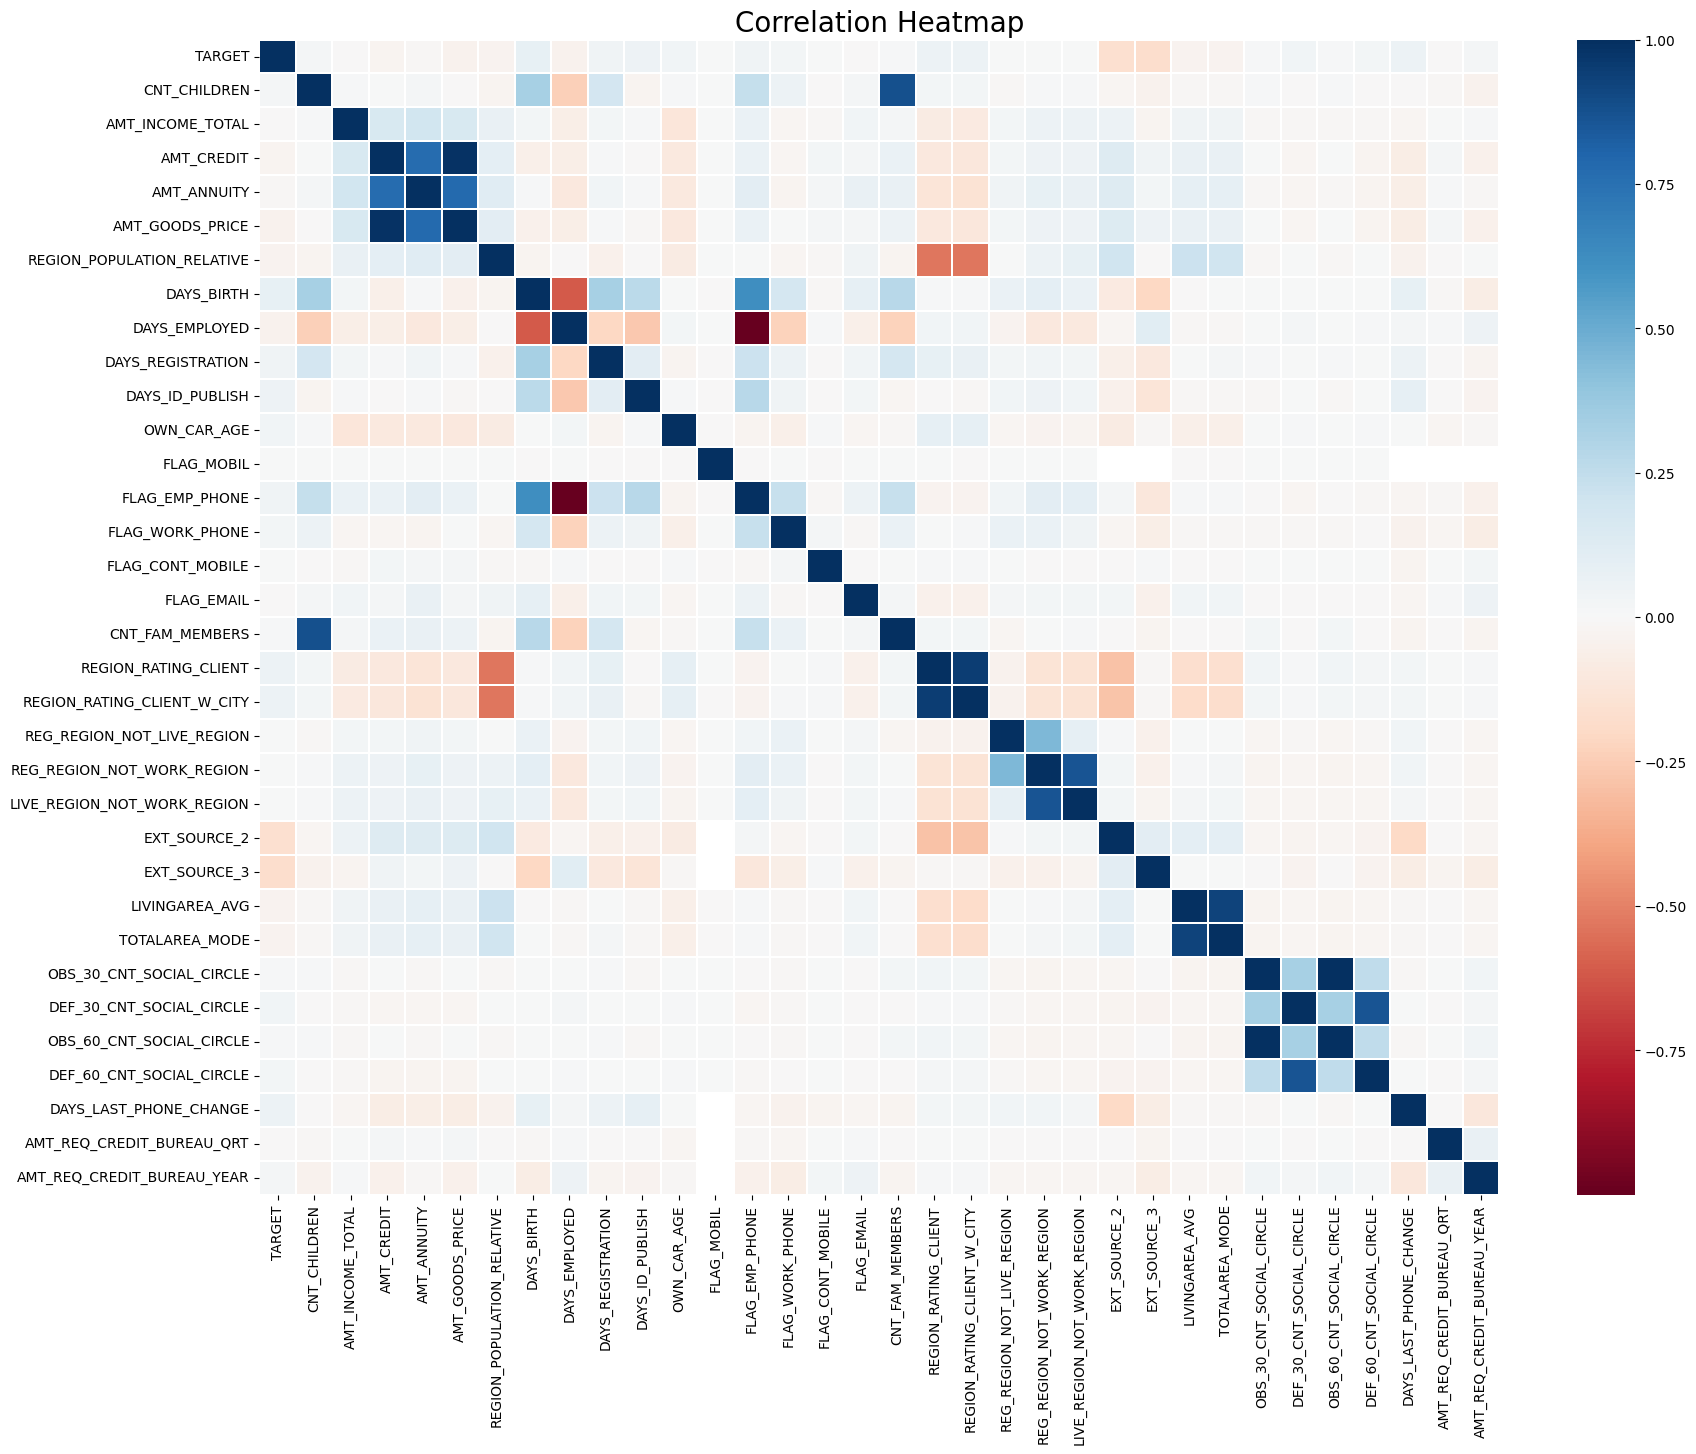

In [ ]:
heatmap_with_corr(train_data)

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

#null numerical coloum analysis

print('for numerical columns : \n ')
nvar020 = num_null_df[(num_null_df['Percentage'] <= 20) & (num_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(nvar020)}\n')
nvar2040 = num_null_df[(num_null_df['Percentage'] <= 40) & (num_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(nvar2040)}\n')
nvar4060 = num_null_df[(num_null_df['Percentage'] <= 60) & (num_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(nvar4060)}\n')
nvar6080 = num_null_df[(num_null_df['Percentage'] <= 80) & (num_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(nvar6080)}\n')
nvar80100 = num_null_df[(num_null_df['Percentage'] <= 100) & (num_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(nvar80100)}\n')

#null categerical coloum analysis

print('for categeical columns : \n ')
cvar020 = cat_null_df[(cat_null_df['Percentage'] <= 20) & (cat_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(cvar020)}\n')
cvar2040 = cat_null_df[(cat_null_df['Percentage'] <= 40) & (cat_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(cvar2040)}\n')
cvar4060 = cat_null_df[(cat_null_df['Percentage'] <= 60) & (cat_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(cvar4060)}\n')
cvar6080 = cat_null_df[(cat_null_df['Percentage'] <= 80) & (cat_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(cvar6080)}\n')
cvar80100 = cat_null_df[(cat_null_df['Percentage'] <= 100) & (cat_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(cvar80100)}\n')


data have 17 columns with null values with percentage 38.64 % of all columns

data have 15 numerical columns with null values with percentage 34.09 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.55 % of all columns

for numerical columns : 
 
null columns with percentage 0-20 % : 12

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 2

null columns with percentage 60-80 % : 1

null columns with percentage 80-100 % : 0

for categeical columns : 
 
null columns with percentage 0-20 % : 1

null columns with percentage 20-40 % : 1

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0



In [ ]:
num_null_df

,Columns_names,Nulls_Count,Percentage,Column_Type
19,OWN_CAR_AGE,202929,65.990810,float64
35,LIVINGAREA_AVG,154350,50.193326,float64
36,TOTALAREA_MODE,148431,48.268517,float64
34,EXT_SOURCE_3,60965,19.825307,float64
43,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,float64
42,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,float64
39,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,float64
40,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021,float64
37,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,float64
38,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,float64


In [ ]:
cat_null_df

,Columns_names,Nulls_Count,Percentage,Column_Type
25,OCCUPATION_TYPE,96391,31.345545,object
10,NAME_TYPE_SUITE,1292,0.420148,object


In [ ]:
list_num_60 = columns_with_null_percentage(num_null_df,60)
print(f'numerical columns with null valuse more than or equal 60 % : {list_num_60}\n')
print(f'number of numerical columns with null valuse more than or equal 60 % : {len(list_num_60)}\n')

list_cat_60 = columns_with_null_percentage(cat_null_df,60)
print(f'catiegerical columns with null valuse more than or equal 60 % : {list_cat_60}\n')
print(f'number of catiegerical columns with null valuse more than or equal 60 % : {len(list_cat_60)}\n')

numerical columns with null valuse more than or equal 60 % : ['OWN_CAR_AGE']

number of numerical columns with null valuse more than or equal 60 % : 1

catiegerical columns with null valuse more than or equal 60 % : []

number of catiegerical columns with null valuse more than or equal 60 % : 0



In [ ]:
drop_columns(train_data,list_num_60)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.139376,0.0190,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,0.0549,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.729567,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,NaN,0.1965,0.2898,0.0,0.0,0.0,0.0,-273.0,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,NaN,0.0257,0.0214,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0.218859,0.9279,0.7970,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.661024,0.0061,0.0086,0.0,0.0,0.0,0.0,-322.0,0.0,0.0


In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

#null numerical coloum analysis

print('for numerical columns : \n ')
nvar020 = num_null_df[(num_null_df['Percentage'] <= 20) & (num_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(nvar020)}\n')
nvar2040 = num_null_df[(num_null_df['Percentage'] <= 40) & (num_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(nvar2040)}\n')
nvar4060 = num_null_df[(num_null_df['Percentage'] <= 60) & (num_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(nvar4060)}\n')
nvar6080 = num_null_df[(num_null_df['Percentage'] <= 80) & (num_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(nvar6080)}\n')
nvar80100 = num_null_df[(num_null_df['Percentage'] <= 100) & (num_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(nvar80100)}\n')

#null categerical coloum analysis

print('for categeical columns : \n ')
cvar020 = cat_null_df[(cat_null_df['Percentage'] <= 20) & (cat_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(cvar020)}\n')
cvar2040 = cat_null_df[(cat_null_df['Percentage'] <= 40) & (cat_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(cvar2040)}\n')
cvar4060 = cat_null_df[(cat_null_df['Percentage'] <= 60) & (cat_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(cvar4060)}\n')
cvar6080 = cat_null_df[(cat_null_df['Percentage'] <= 80) & (cat_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(cvar6080)}\n')
cvar80100 = cat_null_df[(cat_null_df['Percentage'] <= 100) & (cat_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(cvar80100)}\n')


data have 16 columns with null values with percentage 37.21 % of all columns

data have 14 numerical columns with null values with percentage 32.56 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.65 % of all columns

for numerical columns : 
 
null columns with percentage 0-20 % : 12

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 2

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0

for categeical columns : 
 
null columns with percentage 0-20 % : 1

null columns with percentage 20-40 % : 1

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0



In [ ]:
num_row_below_15 = columns_with_null_rows(num_null_df,15)
print(f'numerical colunms with null rows below 15 : {num_row_below_15}\n')
print(f'number of numerical colunms with null rows below 15 : {len(num_row_below_15)}\n')

cat_row_below_15 = columns_with_null_rows(cat_null_df,15)
print(f'catergerical colunms with null rows below 15 : {cat_row_below_15}\n')
print(f'number of categerical colunms with null rows below 15 : {len(cat_row_below_15)}\n')

numerical colunms with null rows below 15 : ['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

number of numerical colunms with null rows below 15 : 3

catergerical colunms with null rows below 15 : []

number of categerical colunms with null rows below 15 : 0



In [ ]:
train_data = drop_rows(train_data,num_row_below_15)

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

#null numerical coloum analysis

print('for numerical columns : \n ')
nvar020 = num_null_df[(num_null_df['Percentage'] <= 20) & (num_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(nvar020)}\n')
nvar2040 = num_null_df[(num_null_df['Percentage'] <= 40) & (num_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(nvar2040)}\n')
nvar4060 = num_null_df[(num_null_df['Percentage'] <= 60) & (num_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(nvar4060)}\n')
nvar6080 = num_null_df[(num_null_df['Percentage'] <= 80) & (num_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(nvar6080)}\n')
nvar80100 = num_null_df[(num_null_df['Percentage'] <= 100) & (num_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(nvar80100)}\n')

#null categerical coloum analysis

print('for categeical columns : \n ')
cvar020 = cat_null_df[(cat_null_df['Percentage'] <= 20) & (cat_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(cvar020)}\n')
cvar2040 = cat_null_df[(cat_null_df['Percentage'] <= 40) & (cat_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(cvar2040)}\n')
cvar4060 = cat_null_df[(cat_null_df['Percentage'] <= 60) & (cat_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(cvar4060)}\n')
cvar6080 = cat_null_df[(cat_null_df['Percentage'] <= 80) & (cat_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(cvar6080)}\n')
cvar80100 = cat_null_df[(cat_null_df['Percentage'] <= 100) & (cat_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(cvar80100)}\n')


data have 13 columns with null values with percentage 30.23 % of all columns

data have 11 numerical columns with null values with percentage 25.58 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.65 % of all columns

for numerical columns : 
 
null columns with percentage 0-20 % : 9

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 2

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0

for categeical columns : 
 
null columns with percentage 0-20 % : 1

null columns with percentage 20-40 % : 1

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0



In [ ]:
x = list(num_null_df['Columns_names'])
print(f'{x}\n')
print(f'{len(x)}\n')

['LIVINGAREA_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE']

11



In [ ]:
!pip install missforest
!pip install lightgbm

In [ ]:
df_imputed = miss_forest_impute(train_data,x)
df_imputed

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [04:09<00:00, 49.97s/it]
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:494: UserWarning: In v

,LIVINGAREA_AVG,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE
0,0.019000,0.014900,0.139376,0.000000,1.000000,2.0,2.0,2.0,2.0,0.262949,351000.0
1,0.054900,0.071400,0.553648,0.000000,0.000000,0.0,1.0,1.0,0.0,0.622246,1129500.0
2,0.073569,0.068589,0.729567,0.000000,0.000000,0.0,0.0,0.0,0.0,0.555912,135000.0
3,0.074027,0.068873,0.608159,0.057439,1.235827,0.0,2.0,2.0,0.0,0.650442,297000.0
4,0.073963,0.068937,0.486870,0.000000,0.000000,0.0,0.0,0.0,0.0,0.322738,513000.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,0.196500,0.289800,0.543779,0.040525,1.052614,0.0,0.0,0.0,0.0,0.681632,225000.0
307507,0.025700,0.021400,0.496294,0.091432,0.975211,0.0,0.0,0.0,0.0,0.115992,225000.0
307508,0.927900,0.797000,0.218859,0.000000,1.000000,0.0,6.0,6.0,0.0,0.535722,585000.0
307509,0.006100,0.008600,0.661024,0.000000,0.000000,0.0,0.0,0.0,0.0,0.514163,319500.0


In [ ]:
print(df_imputed.shape)

(307496, 11)


In [ ]:
train_data[x] = df_imputed

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

#null numerical coloum analysis

print('for numerical columns : \n ')
nvar020 = num_null_df[(num_null_df['Percentage'] <= 20) & (num_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(nvar020)}\n')
nvar2040 = num_null_df[(num_null_df['Percentage'] <= 40) & (num_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(nvar2040)}\n')
nvar4060 = num_null_df[(num_null_df['Percentage'] <= 60) & (num_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(nvar4060)}\n')
nvar6080 = num_null_df[(num_null_df['Percentage'] <= 80) & (num_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(nvar6080)}\n')
nvar80100 = num_null_df[(num_null_df['Percentage'] <= 100) & (num_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(nvar80100)}\n')

#null categerical coloum analysis

print('for categeical columns : \n ')
cvar020 = cat_null_df[(cat_null_df['Percentage'] <= 20) & (cat_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(cvar020)}\n')
cvar2040 = cat_null_df[(cat_null_df['Percentage'] <= 40) & (cat_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(cvar2040)}\n')
cvar4060 = cat_null_df[(cat_null_df['Percentage'] <= 60) & (cat_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(cvar4060)}\n')
cvar6080 = cat_null_df[(cat_null_df['Percentage'] <= 80) & (cat_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(cvar6080)}\n')
cvar80100 = cat_null_df[(cat_null_df['Percentage'] <= 100) & (cat_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(cvar80100)}\n')


data have 2 columns with null values with percentage 4.65 % of all columns

data have 0 numerical columns with null values with percentage 0.00 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.65 % of all columns

for numerical columns : 
 
null columns with percentage 0-20 % : 0

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0

for categeical columns : 
 
null columns with percentage 0-20 % : 1

null columns with percentage 20-40 % : 1

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0



In [ ]:
train_data.shape

(307496, 43)

In [ ]:
train_data.to_csv("/content/drive/MyDrive/Datasets/train_data_v0.csv\G-V2_imputr-null-numeric.csv")


In [ ]:
z = list(cat_null_df['Columns_names'])
print(f'null cat columns {z}\n')
for i in cat_columns:
  if i in z:
    print('hint this is null column')
  c = check_balance(train_data,i)
  print(i)
  print(c)
  print('\n')

null cat columns ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE']

NAME_FAMILY_STATUS
                  Class   Count  Percentage
0               Married  196424   63.878555
1  Single / not married   45441   14.777753
2        Civil marriage   29773    9.682402
3             Separated   19770    6.429352
4                 Widow   16088    5.231938


FLAG_OWN_REALTY
  Class   Count  Percentage
0     Y  213306   69.368707
1     N   94190   30.631293


NAME_INCOME_TYPE
                  Class   Count  Percentage
0               Working  158767   51.632216
1  Commercial associate   71612   23.288758
2             Pensioner   55362   18.004137
3         State servant   21700    7.057002
4            Unemployed      22    0.007155
5               Student      18    0.005854
6           Businessman      10    0.003252
7       Maternity leave       5    0.001626


NAME_CONTRACT_TYPE
             Class   Count  Percentage
0       Cash loans  278219   90.478901
1  Revolving loans   29277    9.521099


COD

In [ ]:
print(categorical_column_frequency(train_data,cat_columns))

                Value  Frequency  Percentage         Column_name
15         Cash loans     278219   90.478901  NAME_CONTRACT_TYPE
80  House / apartment     272856   88.734813   NAME_HOUSING_TYPE
86      Unaccompanied     248514   80.818612     NAME_TYPE_SUITE
5                   Y     213306   69.368707     FLAG_OWN_REALTY
78                  N     202913   65.988826        FLAG_OWN_CAR
..                ...        ...         ...                 ...
11         Unemployed         22    0.007155    NAME_INCOME_TYPE
12            Student         18    0.005854    NAME_INCOME_TYPE
13        Businessman         10    0.003252    NAME_INCOME_TYPE
14    Maternity leave          5    0.001626    NAME_INCOME_TYPE
19                XNA          4    0.001301         CODE_GENDER

[113 rows x 4 columns]


In [ ]:
print(cat_null_df)
print('\n')
print(check_balance(train_data,'NAME_TYPE_SUITE'))
print('\n')
print(check_balance(train_data,'OCCUPATION_TYPE'))

      Columns_names  Nulls_Count  Percentage Column_Type
24  OCCUPATION_TYPE        96390   31.346749      object
10  NAME_TYPE_SUITE         1290    0.419518      object


             Class   Count  Percentage
0    Unaccompanied  248514   80.818612
1           Family   40148   13.056430
2  Spouse, partner   11370    3.697609
3         Children    3267    1.062453
4          Other_B    1770    0.575617
5          Other_A     866    0.281630
6  Group of people     271    0.088131


                    Class  Count  Percentage
0                Laborers  55184   17.946250
1             Sales staff  32101   10.439485
2              Core staff  27569    8.965645
3                Managers  21369    6.949359
4                 Drivers  18602    6.049510
5   High skill tech staff  11379    3.700536
6             Accountants   9811    3.190611
7          Medicine staff   8536    2.775971
8          Security staff   6720    2.185394
9           Cooking staff   5945    1.933358
10         Cleanin

In [ ]:
num,cat = split_num_cat(train_data)
cat

['NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE']

In [ ]:
train_data = impute_categorical(train_data,cat)

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

#null numerical coloum analysis

print('for numerical columns : \n ')
nvar020 = num_null_df[(num_null_df['Percentage'] <= 20) & (num_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(nvar020)}\n')
nvar2040 = num_null_df[(num_null_df['Percentage'] <= 40) & (num_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(nvar2040)}\n')
nvar4060 = num_null_df[(num_null_df['Percentage'] <= 60) & (num_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(nvar4060)}\n')
nvar6080 = num_null_df[(num_null_df['Percentage'] <= 80) & (num_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(nvar6080)}\n')
nvar80100 = num_null_df[(num_null_df['Percentage'] <= 100) & (num_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(nvar80100)}\n')

#null categerical coloum analysis

print('for categeical columns : \n ')
cvar020 = cat_null_df[(cat_null_df['Percentage'] <= 20) & (cat_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(cvar020)}\n')
cvar2040 = cat_null_df[(cat_null_df['Percentage'] <= 40) & (cat_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(cvar2040)}\n')
cvar4060 = cat_null_df[(cat_null_df['Percentage'] <= 60) & (cat_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(cvar4060)}\n')
cvar6080 = cat_null_df[(cat_null_df['Percentage'] <= 80) & (cat_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(cvar6080)}\n')
cvar80100 = cat_null_df[(cat_null_df['Percentage'] <= 100) & (cat_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(cvar80100)}\n')


data have 0 columns with null values with percentage 0.00 % of all columns

data have 0 numerical columns with null values with percentage 0.00 % of all columns

data have 0 catigeriocal columns with null values with percentage 0.00 % of all columns

for numerical columns : 
 
null columns with percentage 0-20 % : 0

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0

for categeical columns : 
 
null columns with percentage 0-20 % : 0

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0



In [ ]:
train_data.to_csv("/content/drive/MyDrive/Datasets/train_data_v0.csv\G-V2_imputr-all-nulls.csv")
